# Identifying Patterns and Trends in Campus Placement Data using Machine Learning:

Table Content:
  
  1.Introduction
  
  2.Installing Libraries
  
  3.Importing Data
  
  4.Missing Value Analysis
  
  5.Exploratory Data Analysis
  
  6.Modeling
  
  7.Prediction

INTRODUCTION:

Campus placement is the process of recruiting graduates from colleges and universities by companies. It is an important process for both students and companies. Students need to get placement offers to start their careers, and companies need to find the best talent to fill their open positions.

Machine learning is a type of artificial intelligence that can be used to identify patterns and trends in data. This can be used to improve the campus placement process in a number of ways.

In [2]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [3]:
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


Loading Dataset:

In [19]:
df=pd.read_csv("Placement_Data_Full_Class.csv")
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


Data Cleaning:

In [20]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [21]:
#Remove unwanted features
df.drop(['sl_no','ssc_b','hsc_b','salary'],axis=1,inplace=True)

EDA

In [22]:
df.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   hsc_p           215 non-null    float64
 3   hsc_s           215 non-null    object 
 4   degree_p        215 non-null    float64
 5   degree_t        215 non-null    object 
 6   workex          215 non-null    object 
 7   etest_p         215 non-null    float64
 8   specialisation  215 non-null    object 
 9   mba_p           215 non-null    float64
 10  status          215 non-null    object 
dtypes: float64(5), object(6)
memory usage: 18.6+ KB


In [24]:
df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p
count,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186
std,10.827205,10.897509,7.358743,13.275956,5.833385
min,40.890000,37.000000,50.000000,50.000000,51.210000
25%,60.600000,60.900000,61.000000,60.000000,57.945000
50%,67.000000,65.000000,66.000000,71.000000,62.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000
max,89.400000,97.700000,91.000000,98.000000,77.890000


In [25]:
df['status'].value_counts()


Placed        148
Not Placed     67
Name: status, dtype: int64

In [26]:
df.shape

(215, 11)

In [27]:
df.dtypes


gender             object
ssc_p             float64
hsc_p             float64
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
dtype: object

Data Visualization:

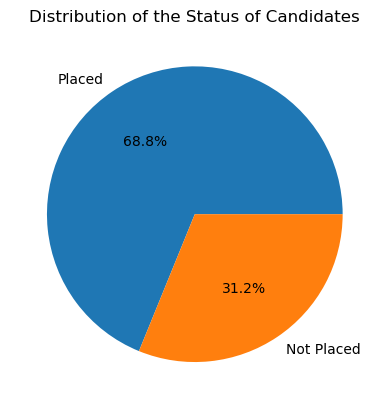

In [28]:
status_counts = df['status'].value_counts()
plt.pie(status_counts, labels = status_counts.index, autopct = '%1.1f%%')
plt.title('Distribution of the Status of Candidates')
plt.show()

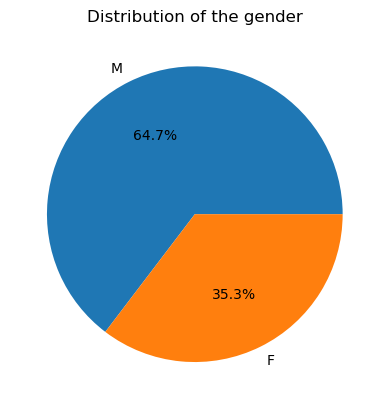

In [29]:
status_counts = df['gender'].value_counts()
plt.pie(status_counts, labels = status_counts.index, autopct = '%1.1f%%')
plt.title('Distribution of the gender')
plt.show()

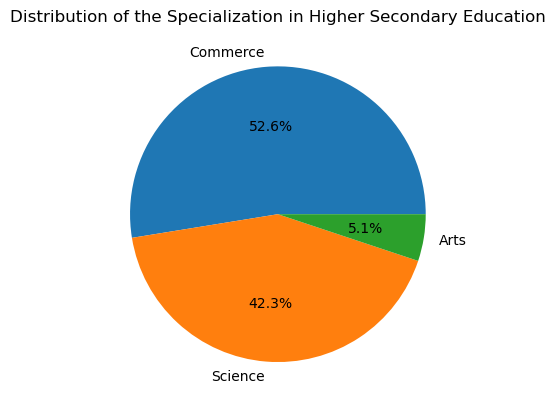

In [30]:
status_counts = df['hsc_s'].value_counts()
plt.pie(status_counts, labels = status_counts.index, autopct = '%1.1f%%')
plt.title('Distribution of the Specialization in Higher Secondary Education')
plt.show()

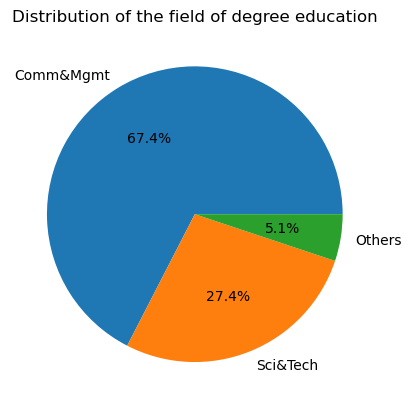

In [31]:
status_counts = df['degree_t'].value_counts()
plt.pie(status_counts, labels = status_counts.index, autopct = '%1.1f%%')
plt.title('Distribution of the field of degree education')
plt.show()

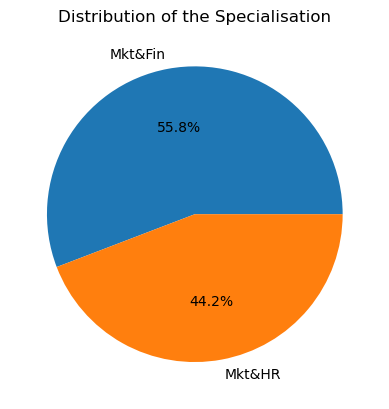

In [32]:
status_counts = df['specialisation'].value_counts()
plt.pie(status_counts, labels = status_counts.index, autopct = '%1.1f%%')
plt.title('Distribution of the Specialisation')
plt.show()

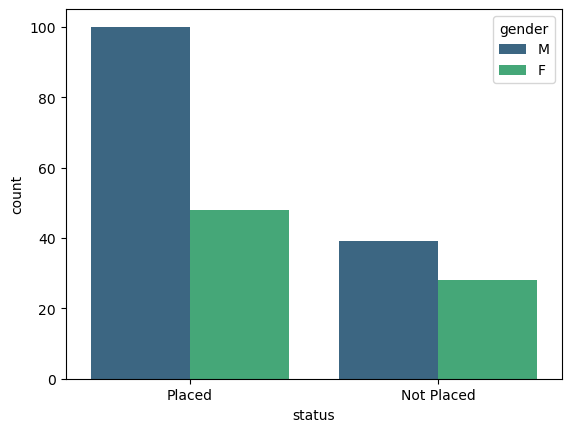

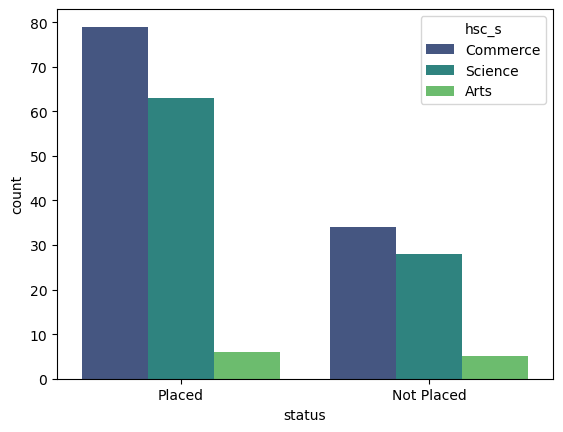

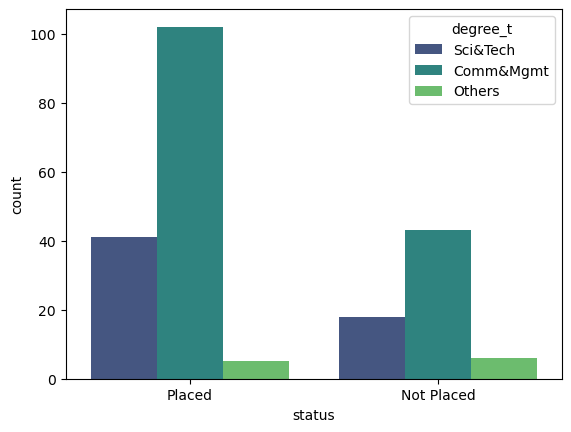

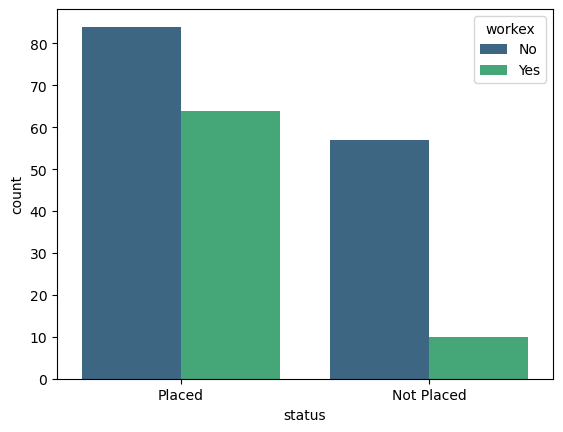

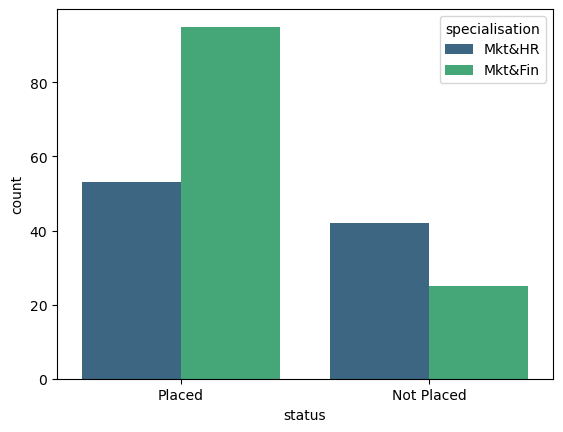

In [33]:
col_list = ['gender', 'hsc_s', 'degree_t', 'workex', 'specialisation']
for g in col_list:
    sns.countplot(data = df, x = "status", hue = g, palette = "viridis")
    plt.show()

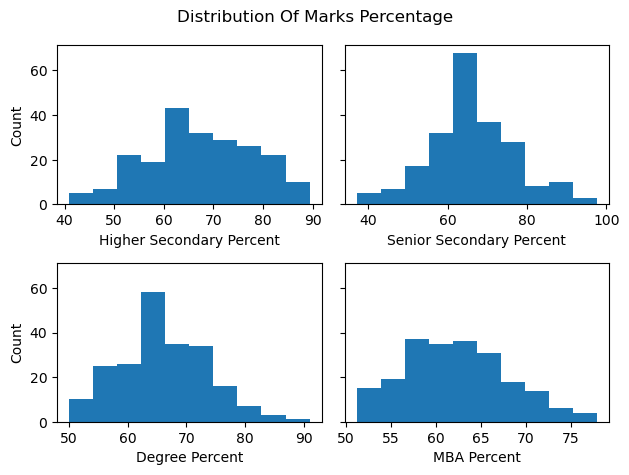

In [34]:
fig, ax = plt.subplots(2, 2, sharey=True)
ax[0, 0].hist(df.ssc_p, bins=10)
ax[0, 1].hist(df.hsc_p, bins=10)
ax[1, 0].hist(df.degree_p, bins=10)
ax[1, 1].hist(df.mba_p, bins=10)

ax[0, 0].set_ylabel("Count")
ax[1, 0].set_ylabel("Count")
ax[0, 0].set_xlabel("Higher Secondary Percent")
ax[0, 1].set_xlabel("Senior Secondary Percent")
ax[1, 0].set_xlabel("Degree Percent")
ax[1, 1].set_xlabel("MBA Percent")
fig.suptitle("Distribution Of Marks Percentage")
plt.tight_layout()
plt.show()

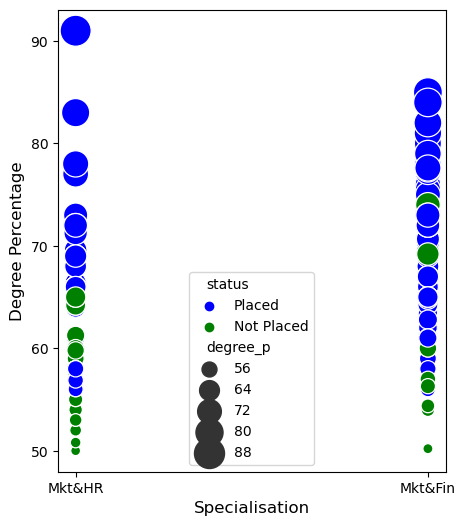

In [35]:
plt.figure(figsize = (5,6))
colors = ['b', 'g']
sns.scatterplot(data = df, x = 'specialisation', y = 'degree_p', hue = 'status',
                palette = colors, size = 'degree_p', sizes = (50, 500))

plt.xlabel('Specialisation', fontsize=12)
plt.ylabel('Degree Percentage', fontsize=12)
plt.show()


In [36]:
def data_stats(df, query_col, target_col, aggregation_func=np.mean, columns_list=None):
    """
    functions describe the basic stats (count, probability) groupby operations based on query column on target column
    """
    print(f"Total placed based on {query_col} \n")
    print(pd.crosstab(df[query_col], df[target_col], margins="True"))
    print("=" * 50)
    print(f"Proportion of placed student based on {query_col} \n")
    print(
        pd.pivot_table(
            data=df,
            index=query_col,
            values=target_col,
            aggfunc=aggregation_func,
            columns=columns_list,
            sort=True,
        )
    )

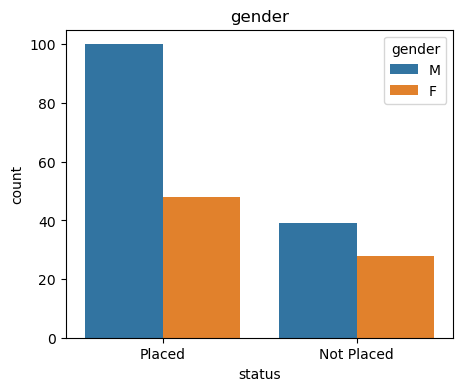

Total placed based on gender 

status  Not Placed  Placed  All
gender                         
F               28      48   76
M               39     100  139
All             67     148  215
Proportion of placed student based on gender 

Empty DataFrame
Columns: []
Index: [F, M]


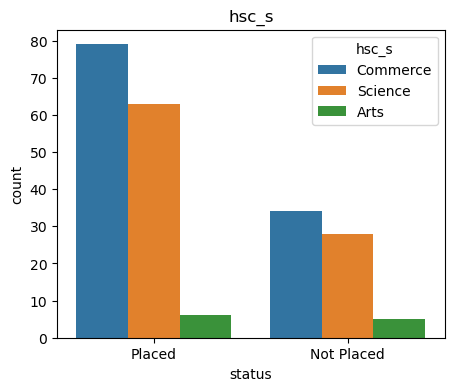

Total placed based on hsc_s 

status    Not Placed  Placed  All
hsc_s                            
Arts               5       6   11
Commerce          34      79  113
Science           28      63   91
All               67     148  215
Proportion of placed student based on hsc_s 

Empty DataFrame
Columns: []
Index: [Arts, Commerce, Science]


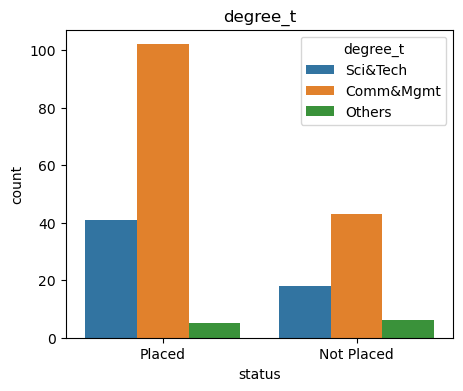

Total placed based on degree_t 

status     Not Placed  Placed  All
degree_t                          
Comm&Mgmt          43     102  145
Others              6       5   11
Sci&Tech           18      41   59
All                67     148  215
Proportion of placed student based on degree_t 

Empty DataFrame
Columns: []
Index: [Comm&Mgmt, Others, Sci&Tech]


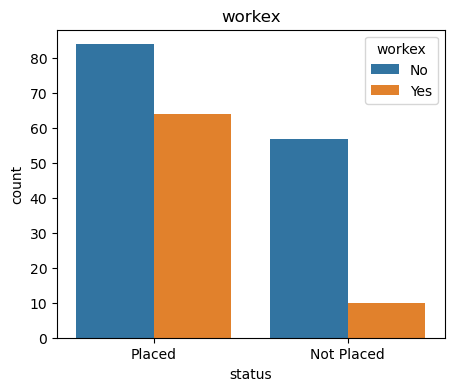

Total placed based on workex 

status  Not Placed  Placed  All
workex                         
No              57      84  141
Yes             10      64   74
All             67     148  215
Proportion of placed student based on workex 

Empty DataFrame
Columns: []
Index: [No, Yes]


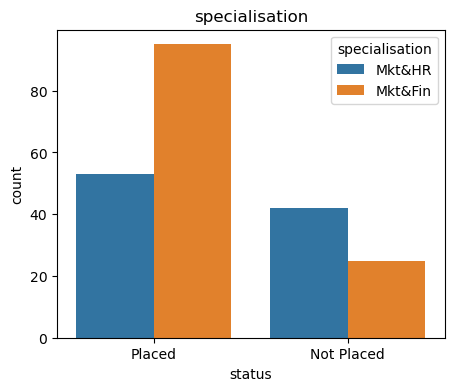

Total placed based on specialisation 

status          Not Placed  Placed  All
specialisation                         
Mkt&Fin                 25      95  120
Mkt&HR                  42      53   95
All                     67     148  215
Proportion of placed student based on specialisation 

Empty DataFrame
Columns: []
Index: [Mkt&Fin, Mkt&HR]


In [37]:
col_list = ["gender", "hsc_s", "degree_t", "workex", "specialisation"]
for g in col_list:
    plt.figure(figsize=(5, 4))
    sns.countplot(
        data=df,
        x="status",
        hue=g,
    )
    plt.title(f"{g}")
    plt.show()
    data_stats(df, g, "status")

In [38]:
df['status'] = df['status'].map({'Placed' : 1, 'Not Placed' : 0})

<Axes: xlabel='status', ylabel='count'>

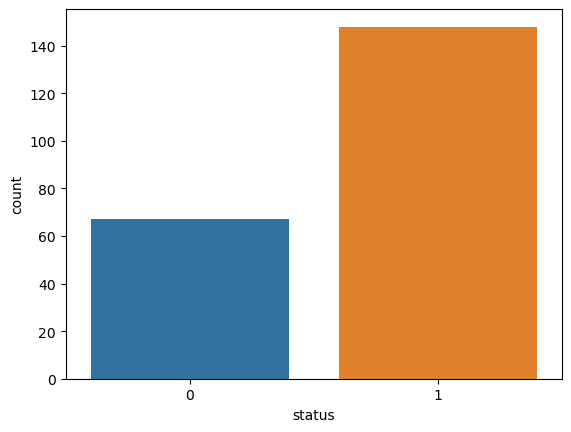

In [39]:
sns.countplot(x='status',data=df)

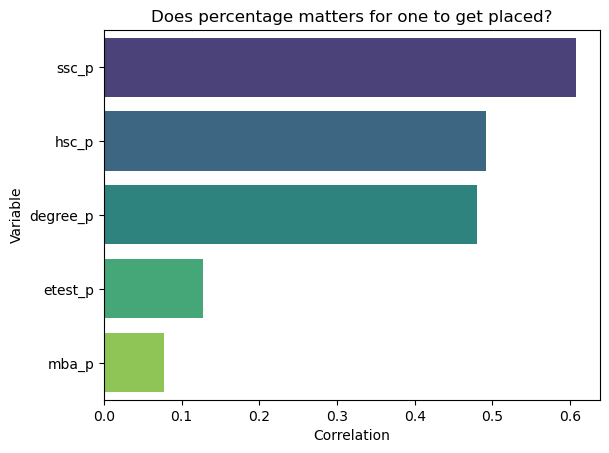

In [40]:
corr = df.corr()['status'][:-1]

sns.barplot(x = corr.values, y = corr.index, palette = 'viridis')
plt.title('Does percentage matters for one to get placed?')
plt.xlabel('Correlation')
plt.ylabel('Variable')
plt.show()

<Axes: >

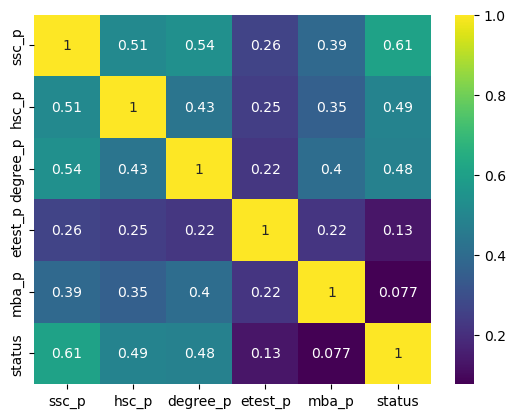

In [41]:
sns.heatmap(df.corr(), annot = True, cmap = 'viridis')

Convert Categorical data into Numerical:

In [79]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
lst=['gender','hsc_s','degree_t','workex','specialisation','status']
for i in lst:
  df[i]=le.fit_transform(df[i])
df

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,91.00,1,58.00,2,0,55.0,1,58.80,1
1,1,79.33,78.33,2,77.48,2,1,86.5,0,66.28,1
2,1,65.00,68.00,0,64.00,0,0,75.0,0,57.80,1
3,1,56.00,52.00,2,52.00,2,0,66.0,1,59.43,0
4,1,85.80,73.60,1,73.30,0,0,96.8,0,55.50,1
...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,82.00,1,77.60,0,0,91.0,0,74.49,1
211,1,58.00,60.00,2,72.00,2,0,74.0,0,53.62,1
212,1,67.00,67.00,1,73.00,0,1,59.0,0,69.72,1
213,0,74.00,66.00,1,58.00,0,0,70.0,1,60.23,1


In [80]:
df.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,91.00,1,58.00,2,0,55.0,1,58.80,1
1,1,79.33,78.33,2,77.48,2,1,86.5,0,66.28,1
2,1,65.00,68.00,0,64.00,0,0,75.0,0,57.80,1
3,1,56.00,52.00,2,52.00,2,0,66.0,1,59.43,0
4,1,85.80,73.60,1,73.30,0,0,96.8,0,55.50,1


Splitting data into Train and Test:

In [81]:
X = df.drop('status', axis = 1)
y = df['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)


K Neighbors classifier

In [82]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.47      0.64        15
           1       0.78      1.00      0.88        28

    accuracy                           0.81        43
   macro avg       0.89      0.73      0.76        43
weighted avg       0.86      0.81      0.79        43



Support Vector Classifier

In [83]:
svc=SVC()
svc.fit(X_train,y_train)
y_pred1=svc.predict(X_test)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.47      0.64        15
           1       0.78      1.00      0.88        28

    accuracy                           0.81        43
   macro avg       0.89      0.73      0.76        43
weighted avg       0.86      0.81      0.79        43



Naive Bayes

In [84]:
nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred2=nb.predict(X_test)
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        15
           1       0.86      0.89      0.88        28

    accuracy                           0.84        43
   macro avg       0.82      0.81      0.82        43
weighted avg       0.84      0.84      0.84        43



Decision Tree

In [85]:
dt=DecisionTreeClassifier(criterion='gini',random_state=1)
dt.fit(X_train,y_train)
y_pred3=dt.predict(X_test)
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.69      0.60      0.64        15
           1       0.80      0.86      0.83        28

    accuracy                           0.77        43
   macro avg       0.75      0.73      0.74        43
weighted avg       0.76      0.77      0.76        43



Random Forest Classifier

In [86]:
rf=RandomForestClassifier(n_estimators=100,random_state=1)
rf.fit(X_train,y_train)
y_pred4=rf.predict(X_test)
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.89      0.53      0.67        15
           1       0.79      0.96      0.87        28

    accuracy                           0.81        43
   macro avg       0.84      0.75      0.77        43
weighted avg       0.83      0.81      0.80        43



AdaBoost

In [87]:
ad=AdaBoostClassifier()
ad.fit(X_train,y_train)
y_pred5=ad.predict(X_test)
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       0.90      1.00      0.95        28

    accuracy                           0.93        43
   macro avg       0.95      0.90      0.92        43
weighted avg       0.94      0.93      0.93        43



Gradient Boosting

In [88]:
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred6=gb.predict(X_test)
print(classification_report(y_test,y_pred6))

              precision    recall  f1-score   support

           0       0.83      0.67      0.74        15
           1       0.84      0.93      0.88        28

    accuracy                           0.84        43
   macro avg       0.84      0.80      0.81        43
weighted avg       0.84      0.84      0.83        43



XG boosting

In [89]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred7=xgb.predict(X_test)
print(classification_report(y_test,y_pred7))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.90      0.93      0.91        28

    accuracy                           0.88        43
   macro avg       0.88      0.86      0.87        43
weighted avg       0.88      0.88      0.88        43



In [90]:
logre=LogisticRegression()
logre.fit(X_train,y_train)
y_pred8=logre.predict(X_test)
print(classification_report(y_test,y_pred8))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        15
           1       0.89      0.89      0.89        28

    accuracy                           0.86        43
   macro avg       0.85      0.85      0.85        43
weighted avg       0.86      0.86      0.86        43



Here we can see the accuracy score of AdaBoost has an accuracy of 93%

In [91]:
y.value_counts()

1    148
0     67
Name: status, dtype: int64

Here we can see that the target variable is highly imbalanced. Hence applying oversampling method which is Random OverSampler

In [92]:
from imblearn.over_sampling import RandomOverSampler
sm=RandomOverSampler()
X_train_sm,y_train_sm=sm.fit_resample(X_train,y_train)
y_train_sm.value_counts()

1    120
0    120
Name: status, dtype: int64

K Neighbors classifier

In [93]:
Knn_sm=KNeighborsClassifier()
Knn_sm.fit(X_train_sm,y_train_sm)
y_pred_sm=Knn_sm.predict(X_test)
print(classification_report(y_test,y_pred_sm))

              precision    recall  f1-score   support

           0       0.53      0.60      0.56        15
           1       0.77      0.71      0.74        28

    accuracy                           0.67        43
   macro avg       0.65      0.66      0.65        43
weighted avg       0.69      0.67      0.68        43



Support Vector Machine

In [94]:
sv_sm=SVC()
sv_sm.fit(X_train_sm,y_train_sm)
y_pred_sm1=sv_sm.predict(X_test)
print(classification_report(y_test,y_pred_sm1))

              precision    recall  f1-score   support

           0       0.71      0.67      0.69        15
           1       0.83      0.86      0.84        28

    accuracy                           0.79        43
   macro avg       0.77      0.76      0.77        43
weighted avg       0.79      0.79      0.79        43



Naive Bayes

In [95]:
nb_sm=GaussianNB()
nb_sm.fit(X_train_sm,y_train_sm)
y_pred_sm2=nb_sm.predict(X_test)
print(classification_report(y_test,y_pred_sm2))

              precision    recall  f1-score   support

           0       0.75      0.80      0.77        15
           1       0.89      0.86      0.87        28

    accuracy                           0.84        43
   macro avg       0.82      0.83      0.82        43
weighted avg       0.84      0.84      0.84        43



Decision Tree Classifier

In [96]:
dt_sm=DecisionTreeClassifier(criterion='entropy')
dt_sm.fit(X_train_sm,y_train_sm)
y_pred_sm3=dt_sm.predict(X_test)
print(classification_report(y_test,y_pred_sm3))

              precision    recall  f1-score   support

           0       0.67      0.53      0.59        15
           1       0.77      0.86      0.81        28

    accuracy                           0.74        43
   macro avg       0.72      0.70      0.70        43
weighted avg       0.74      0.74      0.74        43



Random Forest Classifier

In [97]:
rf_sm=RandomForestClassifier(n_estimators=100,random_state=1)
rf_sm.fit(X_train_sm,y_train_sm)
y_pred_sm4=rf_sm.predict(X_test)
print(classification_report(y_test,y_pred_sm4))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        15
           1       0.86      0.89      0.88        28

    accuracy                           0.84        43
   macro avg       0.82      0.81      0.82        43
weighted avg       0.84      0.84      0.84        43



Logistic Regression

In [98]:
Lor_sm=LogisticRegression(random_state=0)
Lor_sm.fit(X_train_sm,y_train_sm)
y_pred_sm5=Lor_sm.predict(X_test)
print(classification_report(y_test,y_pred_sm5))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81        15
           1       0.92      0.86      0.89        28

    accuracy                           0.86        43
   macro avg       0.84      0.86      0.85        43
weighted avg       0.87      0.86      0.86        43



AdaBoost

In [99]:
ad_sm=AdaBoostClassifier()
ad_sm.fit(X_train_sm,y_train_sm)
y_pred_sm6=ad_sm.predict(X_test)
print(classification_report(y_test,y_pred_sm6))

              precision    recall  f1-score   support

           0       0.92      0.73      0.81        15
           1       0.87      0.96      0.92        28

    accuracy                           0.88        43
   macro avg       0.89      0.85      0.87        43
weighted avg       0.89      0.88      0.88        43



Gradient Boosting

In [100]:
gb_sm=GradientBoostingClassifier()
gb_sm.fit(X_train_sm,y_train_sm)
y_pred_sm7=gb_sm.predict(X_test)
print(classification_report(y_test,y_pred_sm7))

              precision    recall  f1-score   support

           0       0.82      0.60      0.69        15
           1       0.81      0.93      0.87        28

    accuracy                           0.81        43
   macro avg       0.82      0.76      0.78        43
weighted avg       0.81      0.81      0.81        43



XG Boost

In [101]:
xgb_sm=XGBClassifier()
xgb_sm.fit(X_train_sm,y_train_sm)
y_pred_sm8=xgb_sm.predict(X_test)
print(classification_report(y_test,y_pred_sm8))

              precision    recall  f1-score   support

           0       0.85      0.73      0.79        15
           1       0.87      0.93      0.90        28

    accuracy                           0.86        43
   macro avg       0.86      0.83      0.84        43
weighted avg       0.86      0.86      0.86        43



Prediction:

In [102]:
predict_op=ad.predict(X_test)
print(predict_op)

[1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0
 1 1 1 1 0 1]


In [74]:
X_test['pred'] = y_pred
X_test

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,pred
108,1,61.00,82.00,1,69.00,0,0,84.00,0,58.31,1
207,1,83.33,78.00,1,61.00,0,1,88.56,0,71.55,1
106,1,61.08,50.00,2,54.00,2,0,71.00,0,65.69,0
107,1,82.00,90.00,1,83.00,0,0,80.00,1,73.52,1
51,1,54.40,61.12,1,56.20,0,0,67.00,1,62.65,0
33,0,87.00,65.00,2,81.00,0,1,88.00,0,72.78,1
59,1,52.60,65.58,2,72.11,2,0,57.60,0,56.66,1
152,0,75.40,60.50,2,84.00,2,0,98.00,0,65.25,1
4,1,85.80,73.60,1,73.30,0,0,96.80,0,55.50,1
31,0,67.00,53.00,2,65.00,2,0,64.00,1,58.32,1


In [103]:
acc=accuracy_score(predict_op,y_test)
print("The Accuracy Score for AdaBoost",acc)

The Accuracy Score for AdaBoost 0.9302325581395349


After applying oversampling technique we can see that the accuracy of Random Forest has increased from 81 to 84.

But We can see that the Accuracy of Adaboost classifier remains the highest before applying oversampling which is 93%